# Introduction

Imbalanced dataset causes a lot of trouble for any predictive classifier. Usually in imbalanced dataset, the ratio of minority class is 1:10, which means that among one minority calss will be other 100 cases in majority class. This usually happens in the real-business problem, such as fraud event or spam email. 

In this notebook, I will use Credit card dataset on Kaggle to work and deal with imbalanced dataset. 


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:/project/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

0    0.998273
1    0.001727
Name: Class, dtype: float64

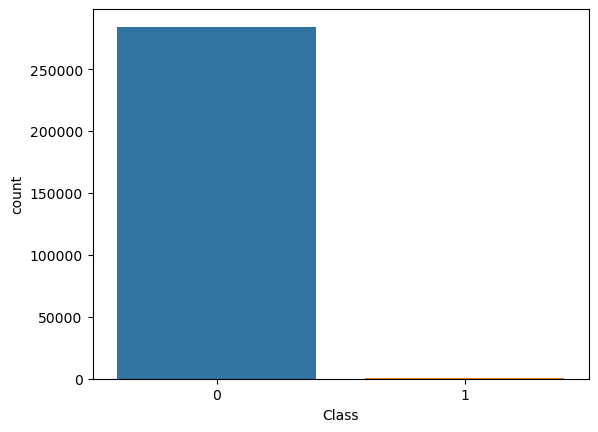

In [4]:
sns.countplot(data=df,x="Class")
df.Class.value_counts(normalize=True)

This is the extreme imbalanced dataset since there is only 0.001% Fraud contained in this dataset. Therefore, in this notebook, I will use some method to handle this problem

# Methodology

Before moving to any technique to deal with imbalanced dataset, we apply Logistic regression model to see how this classification model work on imbalanced binary classes.




In [5]:
#Import library
from sklearn.linear_model import LogisticRegression
#Set input and output features
y=df.Class
X=df.drop("Class",axis=1)
#Test and train dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=27)
#Calling logistic regression model
lr=LogisticRegression(max_iter=500).fit(X_train,y_train)
lr_pred=lr.predict(X_test)

#Accuracy of model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,lr_pred))

0.9991994606893064


Accuracy of logistic regression model is extremely high. However, whenever we work with imbalanced dataset, accuracy is not the rate we should look for. In this case, we should find out the recall rate or precision rate to estimate the model


<AxesSubplot:>

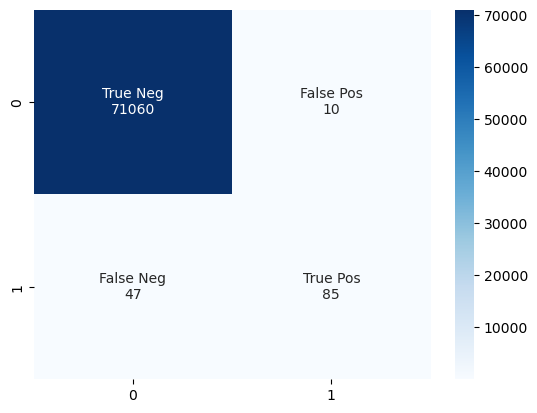

In [6]:
    from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#Confusion matrix
cf_matrix=confusion_matrix(y_test,lr_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')



The accuracy of the model is basically the total correct prediction divied by the total number cases. The precision of a class define how trustable is the result when the model answer that a point belongs to that class. The recall of a class expresses how well the model is able to detect that class. 

The accuracy of the model is calculated as Accuracy=$\frac{71060}{71060+85}=0.9991$. We could see that almost every non-fraud cases are classifed correctly, only 10 was misclassified as fraud. Therefore, the accuracy of this model could be misleaded since the majority observations belong to Non-Fraud class.

Consider the busniess case, when one fraud event causes a huge loss for the company. Hence, it is much more importatnt to predict correctly Fraud event instead of Non-Fraud event. 




In [7]:
#Report
print(classification_report(y_test, lr_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.89      0.64      0.75       132

    accuracy                           1.00     71202
   macro avg       0.95      0.82      0.87     71202
weighted avg       1.00      1.00      1.00     71202



We see the Precision of Non-Fraud class is 100%. It shows that the logistic regression model predicts correctly all non-fraud cases. Hence the Recall of Non-Fraud event is also nearly 100%.

However, the Fraud observations, the Precision is just only 89%. And only 64.4% Fraud cases were classified correctly. We can see that this would be a big trouble that none of company want to have it. 

Since the prediction Fraud as Non-Fraud cases causes the huge loss on revenue. Hence, we want to improve the recall of class 1.

In the below section, I will introduce  some popular methods for dealing with class imbalance.

## 1.Change the algorithm

The first solution could be apply variety of models to deal with imbalanced dataset. Random forest could be the good choice since it usually works well on imbalanced dataset.


In [8]:

from sklearn.ensemble import RandomForestClassifier
#Call the model
dt=RandomForestClassifier(n_estimators=50).fit(X_train,y_train)
#Prediction of Random Forest
dt_pred=dt.predict(X_test)
#Accuracy
print(accuracy_score(y_test,dt_pred))


0.9996067526193084


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.98      0.80      0.88       132

    accuracy                           1.00     71202
   macro avg       0.99      0.90      0.94     71202
weighted avg       1.00      1.00      1.00     71202



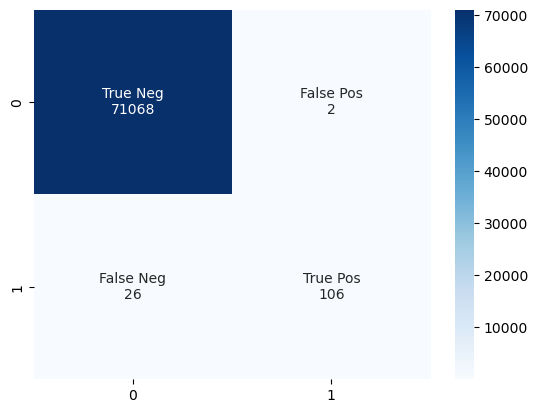

In [9]:
#Confusion matrix
cf_matrix=confusion_matrix(y_test,dt_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

#Report
print(classification_report(y_test, dt_pred))

You could see that after changing the model to Random Forest, the Recall of class 1 increased to 80% and the precision increased to 98%. It shows that the Random Forest method handles the imbalanced dataset much better when it is able to predict correctly Fraud events than Logistic Regression model.

## 2.Resampling techniques
### a. Oversample minority class
In this technique, we try to resample the minority class by adding more copies of the minoirty.

In [15]:
from sklearn.utils import resample
#Set up input and output features
y=df.Class
X=df.drop("Class",axis=1)
#Split training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=27)
#Concate our training data back together
X=pd.concat([X_train,y_train],axis=1)
#Seperate minority and majority classes
not_fraud=X[X.Class==0]
fraud=X[X.Class==1]

#Oversample minority
fraud_sampled=resample(fraud,
                      replace=True,
                      n_samples=len(not_fraud),#match majority cases
                      random_state=27)

#Combine the majority cases and upsampled minority
upsampled=pd.concat([not_fraud,fraud_sampled])
#check new class resample
upsampled.Class.value_counts()

0    213245
1    213245
Name: Class, dtype: int64

We see that after oversampling the minority class, the Fraud and Non-Fraud cases are now equal.

The accuracy of the model: 0.9713210303081374
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71070
           1       0.06      0.90      0.10       132

    accuracy                           0.97     71202
   macro avg       0.53      0.94      0.54     71202
weighted avg       1.00      0.97      0.98     71202



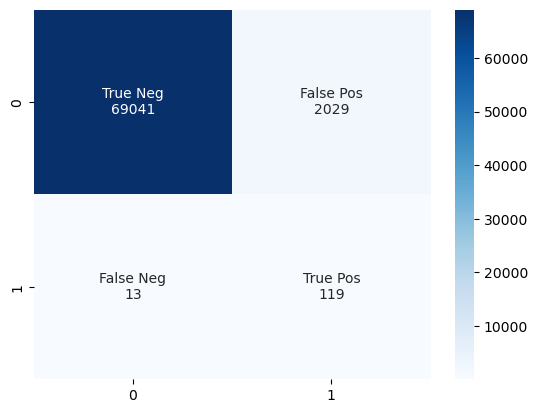

In [19]:
#Set up new input and output
y_train=upsampled.Class
X_train=upsampled.drop("Class",axis=1)

#Train model
lr_upsampled=LogisticRegression(max_iter=500).fit(X_train,y_train)
#Prediction
lr_upsampled_pred=lr_upsampled.predict(X_test)
#Accuracy
print("The accuracy of the model:",accuracy_score(y_test,lr_upsampled_pred))

#Confusion matrix
cf_matrix=confusion_matrix(y_test,lr_upsampled_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

#Report
print(classification_report(y_test, lr_upsampled_pred))

From the report, we see that now the recall of class 1 is much better than previous cases. However, we have the trade-off between the precision and recall since the model also misclassified the Non-Fraud as Fraud cases. 

### 2.Undersample majority class
After oversampling the minority class, we will do in the reverse way, undersample the majority class. 


In [20]:
#Set input and output features
y=df.Class
X=df.drop("Class",axis=1)
#Set training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=27)
#Combine training dataset agin
X=pd.concat([X_train,y_train],axis=1)
#Defind the majority and minority
non_fraud=X[X.Class==0]
fraud=X[X.Class==1]
#Undersample the majority
non_fraud_sampled=resample(non_fraud,
                     replace=True,
                     n_samples=len(fraud),
                     random_state=27)

#Combine the minority and undersampled
undersampled=pd.concat([fraud,non_fraud_sampled])
#Check the new under sample
undersampled.Class.value_counts()

1    360
0    360
Name: Class, dtype: int64

We can see that the undersample technique has reduce the majority class as same as the minority class. And also means that our training dataset has much lower observations compared to testing dataset. It could lead to the underfitting problem.


The accuracy of the model: 0.9692283924608859
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71070
           1       0.05      0.89      0.10       132

    accuracy                           0.97     71202
   macro avg       0.53      0.93      0.54     71202
weighted avg       1.00      0.97      0.98     71202



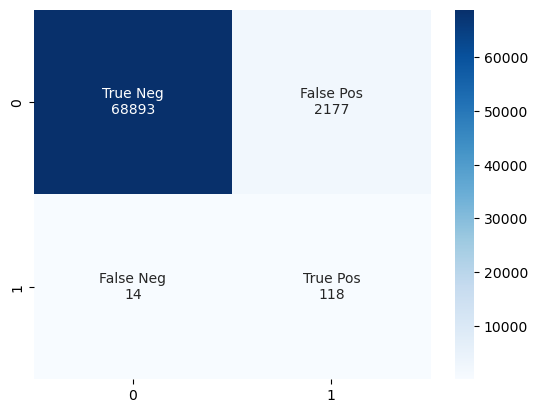

In [21]:
#Train model on undersampled dataset
y_train=undersampled.Class
X_train=undersampled.drop("Class",axis=1)
#Train model
lr_undersampled=LogisticRegression(max_iter=500).fit(X_train,y_train)
#Prediction
lr_undersampled_pred=lr_undersampled.predict(X_test)
#Accuracy
print("The accuracy of the model:",accuracy_score(y_test,lr_undersampled_pred))

#Confusion matrix
cf_matrix=confusion_matrix(y_test,lr_undersampled_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

#Report
print(classification_report(y_test, lr_undersampled_pred))

We see that the recall and precision of Fraud cases in undersampled dataset is as same as the upsampled dataset.
### 3.SMOTE Synthetic samples.
SMOTE is the synthetic technique. It looks for the nearest neighbors of one random minority case and then generate a new and synthetic data.


In [27]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, sampling_strategy='auto',k_neighbors=5)
X_train, y_train = sm.fit_resample(X_train, y_train)

The accuracy of the model: 0.9809977247830117
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.08      0.88      0.15       132

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.57     71202
weighted avg       1.00      0.98      0.99     71202



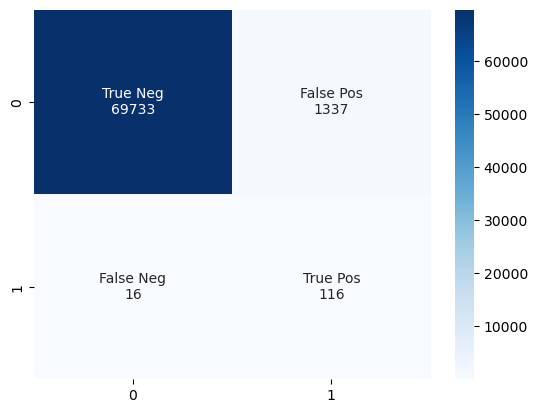

In [31]:
smote=LogisticRegression(max_iter=500).fit(X_train,y_train)
smote_pred=smote.predict(X_test)

#Accuracy
print("The accuracy of the model:",accuracy_score(y_test,smote_pred))

#Confusion matrix
cf_matrix=confusion_matrix(y_test,smote_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

#Report
print(classification_report(y_test, smote_pred))

We could see that our F1-score is increased, but in general this technique gives us the same precision and recall as the two previous resample methods.
# Chaning the threshold
After exploring three common techniques to handle the imbalanced dataset, we will consider the case when we do not applying any technique, just deal with siuation by changing the threshold.

The idea of resampling is not always the best choice since it will distort or bias the resulting probability predictions.

Usually, we limit ourselves by setting up the threshold of 0.5. We want to improve the Recall of class 1 to reduce the fraud misclassification. To do this, we can reduce the threshold for which we say “Class 1” when we predict a probability above the threshold. This way we say “Class 1” for a wider range of predicted probabilities. Such strategies are known as threshold-moving.

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Set input and output features
y=df.Class
X=df.drop("Class",axis=1)

#Split into training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=27)
#Train a model
lr=LogisticRegression(max_iter=500).fit(X_train,y_train)

#Probability Prediction 
lr_predict=lr.predict_proba(X_test)

#Retrivee the probabilities for the Fraud class
yhat_fraud=lr_predict[:,1]


In the threshold-moving strategy, we plot ROC curve. The ROC curve plots a binary classifier’s False Positive Rate (FPR) on the x-axis and True Positive Rate (TPR, Recall) on the y-axis with for all possible probability threshold values between 0 and 1.

ROC is not particularly biased towards either the majority or minority class and is, therefore, a popular choice for both balanced and imbalanced classification problems.

After ploting ROC and calculating AUROC, we find the optimal threshold define by **J statistics**. J Statistics  **J=TPR-FPR**

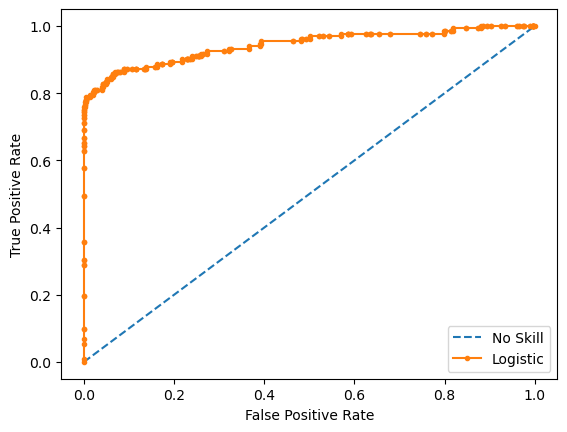

AUROC: 0.943


In [54]:
# plot no skill roc curve - the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

# calculate inputs for the roc curve
fpr, tpr, thresholds = roc_curve(y_test, yhat_fraud)
# plot roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()

# calculate and print AUROC
roc_auc = roc_auc_score(y_test, yhat_fraud)
print('AUROC: %.3f' % roc_auc)

In [55]:
#import the required library
from numpy import argmax
# calculate inputs for the roc curve
fpr, tpr, thresholds = roc_curve(y_test, yhat_fraud)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold: %f' % (best_thresh))

Best Threshold: 0.001938


We find out that at the threshold 0.001938, the difference between True Positive Rate and False Positive Rate is minimum

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     71070
           1       0.02      0.86      0.04       132

    accuracy                           0.93     71202
   macro avg       0.51      0.90      0.50     71202
weighted avg       1.00      0.93      0.96     71202



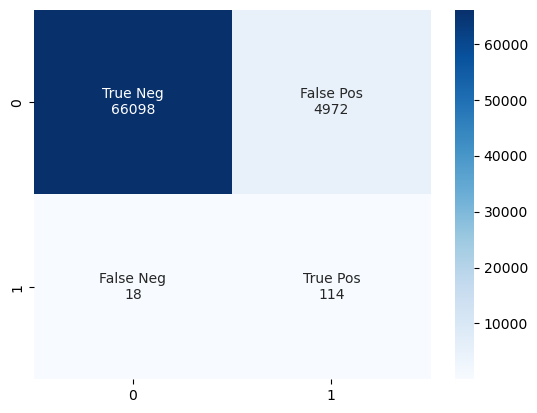

In [59]:
#Set up the threshold prediction
hardpredtst_tuned_thresh = np.where(yhat_fraud >= 0.001938, 1, 0)
#Confusion amtrix
cf_matrix=confusion_matrix(y_test,hardpredtst_tuned_thresh)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

#Report
print(classification_report(y_test, hardpredtst_tuned_thresh))

In [46]:
print(classification_report(y_test, hardpredtst_tuned_thresh))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     71070
           1       0.02      0.86      0.04       132

    accuracy                           0.93     71202
   macro avg       0.51      0.90      0.50     71202
weighted avg       1.00      0.93      0.96     71202



By using the threshold moving technique, the recall of Fraud class is higher than the recall rate in our first logistic regression model. However, it underperforms the resample technique.
# Conclusion
In this notebook, we have understood what is the imbalanced dataset and how it affects on our prediction later. And we went throuh the Resample technique and Threshold Moving technique in order to handle imbalanced dataset.

All of these technique has their pros and cons. Therefore, we should approach the problem with several technique to have our best technique to deal with imbalanced dataset.